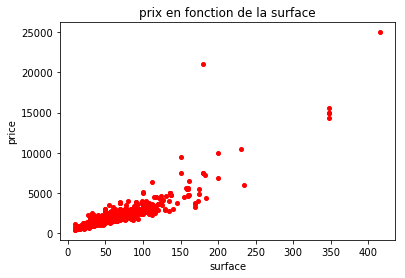

on constacte bien que le prix est une fonction lineaire de la surface.quant la surface augmente le prix augmente aussi


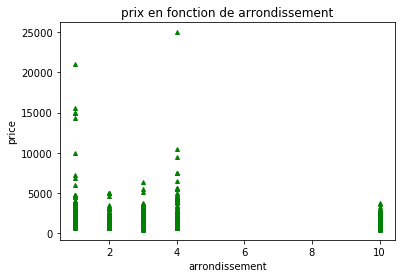

constacte que que le prix n'est pas une fonction lineaire de l'arrondissement mais les arrondissement 1 et 4 ont des plus grands prix


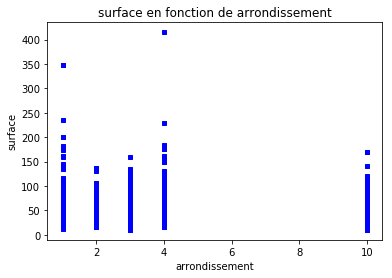

on constate que la surface n'est une fonction lineaire de l'arrondissement.les arrondissement ayant les plus grande surface sont 1 et 4 c'est pour cette raison qu'ils ont les prix elevé
les theta de notre modele sont: [  1.00000000e+00  -2.49223014e-16   1.10485781e-14]
le score est est a: 1.0
le RMSE est egal a: 2.57806663111e-12
on constate qu'il est tres petit cela pouurrai nous donner une premiere vu sur le model


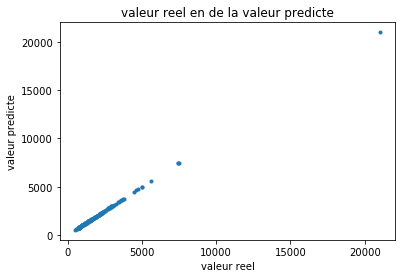

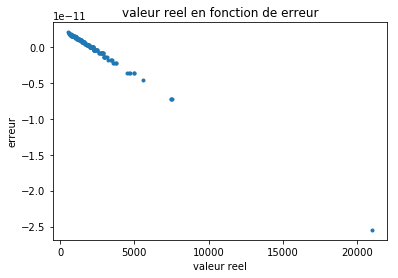

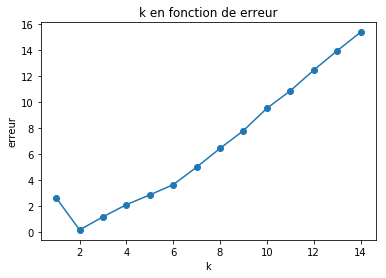

le meilleur k est est celui ayant la plus petite erreur
vu les erreurs des deux modeles il sera preferable de selectionner le modele qui a la plus petite erreur dans notre cas nous choisirons la regresion lineaire


In [6]:
# On importe les librairies dont on aura besoin pour ce tp

import numpy as np

import pandas as pd

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_mldata

# On charge le dataset
house_data = pd.read_csv('house_data.csv')

#pour le traitement des valeurs manquantes nous avons preferé la suppression des valeurs manquantes car son effectifs est petit
house_data=house_data.dropna(axis=0)

# On affiche le nuage de points dont on dispose

plt.plot(house_data['surface'], house_data['price'], 'ro', markersize=4)
plt.title('prix en fonction de la surface')
plt.xlabel('surface')
plt.ylabel('price')
plt.show()
print("on constacte bien que le prix est une fonction lineaire de la surface.quant la surface augmente le prix augmente aussi")

plt.plot(house_data['arrondissement'], house_data['price'], 'g^', markersize=4)
plt.title('prix en fonction de arrondissement')
plt.xlabel('arrondissement')
plt.ylabel('price')
plt.show()
print("constacte que que le prix n'est pas une fonction lineaire de l'arrondissement mais les arrondissement 1 et 4 ont des plus grands prix")

plt.plot( house_data['arrondissement'],house_data['surface'], 'bs', markersize=4)
plt.title('surface en fonction de arrondissement')#titre du graphe
plt.xlabel('arrondissement')#non de l'abscisse
plt.ylabel('surface')#nom de l'ordonné
plt.show()
print("on constate que la surface n'est une fonction lineaire de l'arrondissement.les arrondissement ayant les plus grande surface sont 1 et 4 c'est pour cette raison qu'ils ont les prix elevé")
#division de nos données en 2 training / testing set 80% training et 20% testing
xtrain, xtest, ytrain, ytest = train_test_split(house_data, house_data['price'], train_size=0.8)

#regression lineaire multiple
from sklearn import linear_model
regr=linear_model.LinearRegression()
regr.fit(xtrain,ytrain)
print("les theta de notre modele sont:",regr.coef_)
#cacul du score
print("le score est est a:",regr.score(xtrain,ytrain))
#prediction avec les donnees test(xtest)
regr.predict(xtest)
#calcul du RMSE
RMSE=np.sqrt(((ytest-regr.predict(xtest))**2).sum()/len(xtest))
print("le RMSE est egal a:",RMSE)
print("on constate qu'il est tres petit cela pouurrai nous donner une premiere vu sur le model")
#valeur reel en fonction de la valeur predicte
plt.plot(ytest,regr.predict(xtest),'.')
plt.title('valeur reel en de la valeur predicte')#titre du graphe
plt.xlabel('valeur reel')#non de l'abscisse
plt.ylabel('valeur predicte')#nom de l'ordonné
plt.show()
plt.plot(ytest,ytest-regr.predict(xtest),'.')
plt.title('valeur reel en fonction de erreur')#titre du graphe
plt.xlabel('valeur reel')#non de l'abscisse
plt.ylabel('erreur')#nom de l'ordonné
plt.show()
#K-NN
from sklearn import neighbors
knn=neighbors.KNeighborsRegressor(n_neighbors=2)
knn.fit(xtrain,ytrain)
error=1-knn.score(xtest,ytest)
#optimisation du score pour les données test
errors=[]
for i in range(1,15):
    knn=neighbors.KNeighborsRegressor(n_neighbors=i) 
    errors.append(100*(1-knn.fit(xtrain,ytrain).score(xtest,ytest)))
#erreur en fonction de k
plt.plot(range(1,15),errors,'o-')
plt.title('k en fonction de erreur')#titre du graphe
plt.xlabel('k')#non de l'abscisse
plt.ylabel('erreur')#nom de l'ordonné
plt.show()
print("le meilleur k est est celui ayant la plus petite erreur") 
print("vu les erreurs des deux modeles il sera preferable de selectionner le modele qui a la plus petite erreur dans notre cas nous choisirons la regresion lineaire") 